In [1]:
import pandas as pd
from collections import Counter

In [2]:
data = pd.read_csv("cleaned_zomato_data.csv")
pd.set_option("display.max_columns",21)

In [3]:
# data.head()
# data.info()

## Cuisine Analysis

- Split and exploded the `Cuisines` column to normalize cuisine data
- Identified top cuisines served across all cities
- Found that North Indian, Chinese, and Fast Food are the most common cuisines


In [4]:
counter = Counter()
for i in range (0,len(data)):
    # print(data["Cuisines"][i])
    cuisines = data["Cuisines"][i].split(",")
    cuisines = [c.strip() for c in cuisines]
    counter.update(cuisines)

In [5]:
for i in counter.most_common(20):
    print( i)

('North Indian', 3960)
('Chinese', 2735)
('Fast Food', 1986)
('Mughlai', 995)
('Italian', 764)
('Bakery', 745)
('Continental', 736)
('Cafe', 703)
('Desserts', 653)
('South Indian', 636)
('Street Food', 562)
('American', 390)
('Pizza', 381)
('Mithai', 380)
('Burger', 251)
('Thai', 234)
('Asian', 233)
('Beverages', 229)
('Ice Cream', 226)
('Mexican', 181)


In [6]:
topCuisines = counter.most_common(10)
df = pd.DataFrame(topCuisines)

In [7]:
df.rename(columns = {0: "Cuisines",1:"Cuisines Count"},inplace = True)
df.set_index("Cuisines",inplace = True)

In [8]:
df

,Cuisines Count
Cuisines,
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764
Bakery,745
Continental,736
Cafe,703
Desserts,653


<Axes: title={'center': 'Top 10 Cuisines Served across Cities'}, xlabel='Cuisines', ylabel='Cuisines Count'>

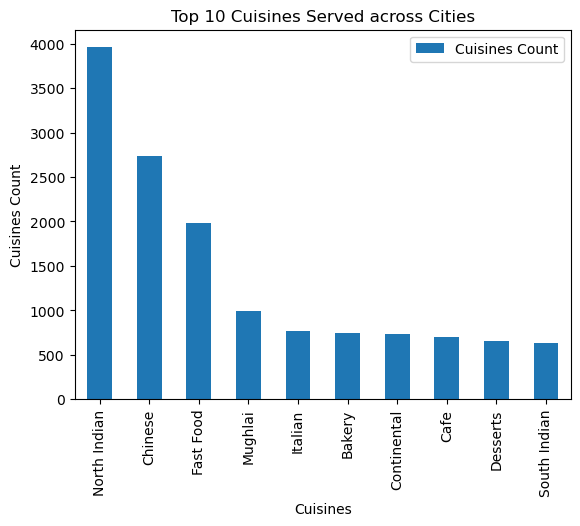

In [9]:
df.plot(kind = "bar"
        ,title = "Top 10 Cuisines Served across Cities"
       ,ylabel = "Cuisines Count")

In [10]:
data.groupby(["City","Cuisines"])["Cuisines"].value_counts().sort_values(ascending = False)

City       Cuisines                                      
New Delhi  North Indian                                      658
           North Indian, Chinese                             284
           Fast Food                                         242
           Chinese                                           228
           North Indian, Mughlai                             207
                                                            ... 
Ahmedabad  North Indian, South Indian, Asian, Continental      1
           Pizza, Italian                                      1
           Pizza, Italian, Beverages, Desserts                 1
Albany     American, BBQ                                       1
Abu Dhabi  Filipino, Japanese, Asian                           1
Name: count, Length: 3031, dtype: int64

In [11]:
city_cuisines = (
    data[["City" , "Cuisines" ]]
    .dropna()
    .assign(Cuisines = lambda x : x["Cuisines"].str.split(","))
    .explode("Cuisines")
)

city_cuisines["Cuisines"] = city_cuisines["Cuisines"].str.strip()

In [12]:
city_cuisines.value_counts().nlargest(10)

City       Cuisines    
New Delhi  North Indian    2425
           Chinese         1638
           Fast Food       1304
           Mughlai          628
Noida      North Indian     532
Gurgaon    North Indian     508
New Delhi  Bakery           465
           South Indian     411
           Street Food      411
Noida      Chinese          384
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Cuisins Across all the cities'}, ylabel='Restaurant Name,Aggregate rating,Cuisines'>

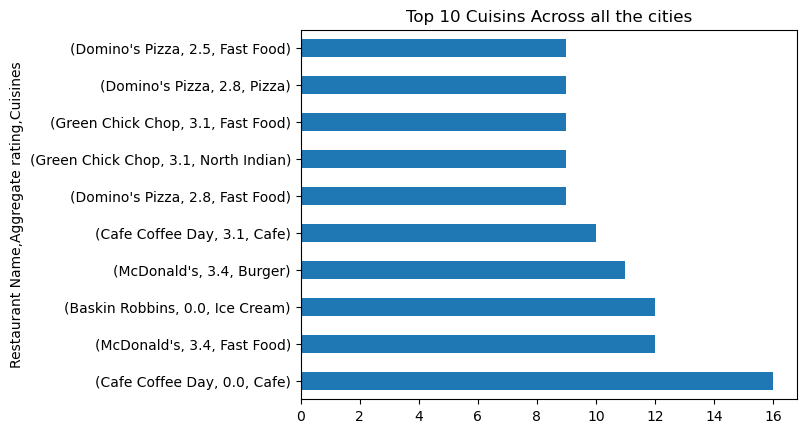

In [31]:
city_cuisines.value_counts().nlargest(10).plot(kind = "barh", title = "Top 10 Cuisins Across all the cities")

In [14]:
city_cuisines_count = city_cuisines.value_counts()
city_cuisines_count

City       Cuisines      
New Delhi  North Indian      2425
           Chinese           1638
           Fast Food         1304
           Mughlai            628
Noida      North Indian       532
                             ... 
Waterloo   Bar Food             1
           Beverages            1
           Breakfast            1
           Burger               1
           Coffee and Tea       1
Name: count, Length: 1857, dtype: int64

## Top Cuisines per City

- Analyzed cuisine distribution city-wise
- Identified the top cuisines for each city
- Observed that certain cuisines dominate specific regions


In [15]:
top_one_cuisines_from_each_city = (
    city_cuisines_count
    .groupby(level = 0)
    .head(1)
)

In [16]:
top_one_cuisines_from_each_city.nlargest(10)

City            Cuisines    
New Delhi       North Indian    2425
Noida           North Indian     532
Gurgaon         North Indian     508
Faridabad       North Indian     122
Ranchi          North Indian      16
Amritsar        North Indian      15
Patna           North Indian      15
Aurangabad      North Indian      15
Agra            North Indian      15
Rio de Janeiro  Brazilian         13
Name: count, dtype: int64

<Axes: title={'center': 'Top One Cusisines From Each City(For Top 10 City)'}, ylabel='City,Cuisines'>

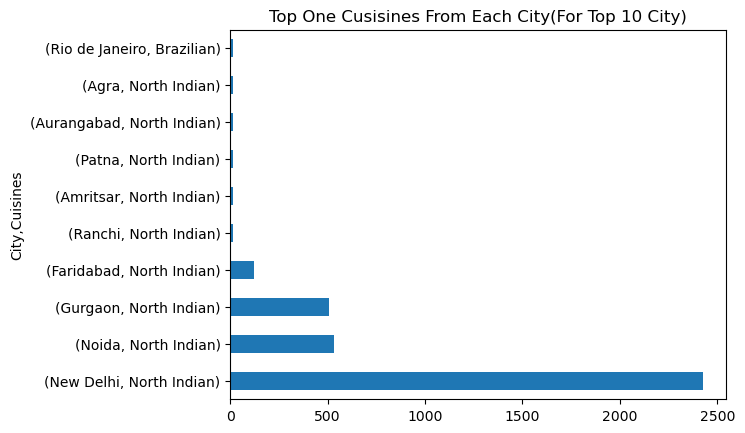

In [17]:
top_one_cuisines_from_each_city.nlargest(10).plot(
    kind = "barh"
    ,title = "Top One Cusisines From Each City(For Top 10 City)")

In [18]:
data.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia


## Distribution of Average Cost for Two

- Visualized cost distribution using histograms
- Found that the data is right-skewed
- Applied IQR method to detect and handle extreme outliers
- Most restaurants fall within an affordable price range

**Insight:**  
Due to the presence of extreme high-cost restaurants, median-based analysis provides a more reliable measure of central tendency than the mean.


In [19]:
Q1 = data["Average Cost for two"].quantile(0.25)
Q3 = data["Average Cost for two"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

1375.0


<Axes: ylabel='Frequency'>

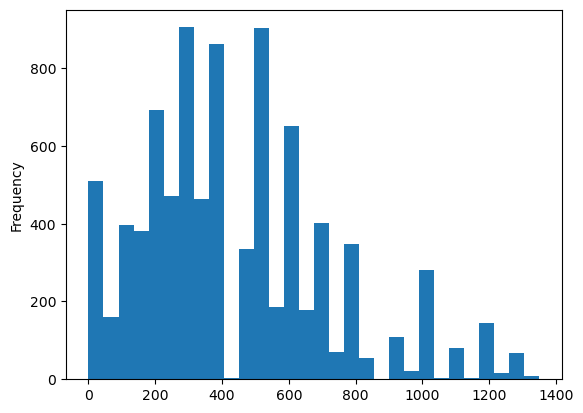

In [20]:
data[data["Average Cost for two"] <= 1375]["Average Cost for two"].plot(kind="hist", bins=30)

In [21]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


Correlation analysis performed on key numeric variables

In [22]:
data.corr(numeric_only = True)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [23]:
corr_data = data[["Average Cost for two"
                  , "Price range"
                  , "Aggregate rating"
                  , "Votes"]].corr()
corr_data

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


## Rating Analysis

- Analyzed how ratings are distributed across restaurants
- Compared ratings with factors such as:
  - Online delivery
  - Table booking
  - Price range
  - Number of cuisines


In [24]:
data.groupby(["Has Online delivery"])["Aggregate rating"].mean()

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

In [25]:
data.groupby(["Has Table booking"]) ["Aggregate rating"].mean()

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

## Number of Cuisines vs Rating

- Calculated the number of cuisines offered by each restaurant
- Grouped restaurants by number of cuisines and analyzed average ratings
- Observed a weak positive relationship between cuisine variety and rating


In [26]:
city_cuisines = (
    data[["Restaurant Name" ,"Aggregate rating", "Cuisines" ]]
    .dropna()
    .assign(Cuisines = lambda x : x["Cuisines"].str.split(","))
    .explode("Cuisines")
)

city_cuisines["Cuisines"] = city_cuisines["Cuisines"].str.strip()

In [27]:
city_cuisines

,Restaurant Name,Aggregate rating,Cuisines
0,Skye,4.1,Italian
0,Skye,4.1,Continental
1,Satoo - Hotel Shangri-La,4.6,Asian
1,Satoo - Hotel Shangri-La,4.6,Indonesian
1,Satoo - Hotel Shangri-La,4.6,Western
...,...,...,...
9548,UrbanCrave,3.9,Italian
9548,UrbanCrave,3.9,Beverages
9549,Deena Chat Bhandar,3.8,Street Food
9550,VNS Live Studio,3.5,Chinese


In [28]:
restaurant_cuisine_count = (
    city_cuisines
    .groupby(["Restaurant Name", "Aggregate rating"])
    .agg(Num_Cuisines=("Cuisines", "count"))
    .reset_index()
)

restaurant_cuisine_count.head(5)

,Restaurant Name,Aggregate rating,Num_Cuisines
0,Let's Burrrp,0.0,2
1,#45,3.6,1
2,#Dilliwaala6,3.7,1
3,#InstaFreeze,0.0,1
4,#OFF Campus,3.7,4


In [29]:
restaurant_cuisine_count.groupby(["Num_Cuisines"])["Aggregate rating"].mean()

Num_Cuisines
1     2.258742
2     2.695058
3     3.038416
4     3.321148
5     3.333908
6     3.310345
7     3.212500
8     3.032258
9     3.400000
10    2.993333
11    2.050000
12    3.137500
13    2.000000
14    2.700000
15    3.533333
16    2.700000
17    3.800000
18    2.900000
19    0.000000
20    0.933333
21    3.350000
22    3.700000
23    3.400000
24    2.600000
27    3.100000
28    2.900000
32    3.400000
35    3.600000
36    3.400000
Name: Aggregate rating, dtype: float64

In [30]:
restaurant_cuisine_count["Num_Cuisines"].corr(restaurant_cuisine_count["Aggregate rating"])

np.float64(0.15360848098890456)

## Key Insights

1. Restaurant distribution is highly skewed toward major cities.
2. North Indian cuisine is the most commonly served cuisine.
3. Online delivery is associated with higher average votes.
4. Table booking is available in a small proportion of restaurants.
5. Average cost for two has many outliers; median is a better representative measure.
6. Restaurants offering more cuisines tend to have slightly higher ratings, but the effect is weak.
7. Ratings are influenced by multiple factors, not cost alone.


## Recommendations

- Encourage online delivery as it improves customer engagement.
- Use median-based pricing insights instead of mean due to outliers.
- Promote cuisine diversity as a supporting factor for better ratings.
- Focus marketing efforts on high-density restaurant cities.
- Consider multi-factor models rather than single-variable assumptions for ratings.


## Conclusion

This analysis provides a comprehensive understanding of restaurant trends, customer preferences, and rating behavior.  
The insights derived can support better decision-making in restaurant aggregation platforms, pricing strategies, and service optimization.
